Input polygon id `test_uid` and scene id `test_sid` along with `scene_date` below:

In [1]:
test_uid = 'r3cbj7d6s'
test_sid = 'e043bffd-05c5-55c3-8740-a973842f7a05'
test_date = '2000-02-02' 

In [2]:
%matplotlib inline

In [3]:
import datacube
dc = datacube.Datacube()

In [4]:
import dea_tools.spatial

In [5]:
import dea_tools.waterbodies

In [6]:
wb = dea_tools.waterbodies.get_waterbody(test_uid)

<AxesSubplot:>

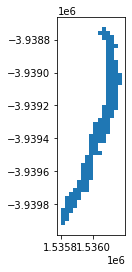

In [7]:
wb.plot()

In [8]:
ds = dc.load(
        'ga_ls_wo_3',
        time=test_date,
        geopolygon=datacube.utils.geometry.Geometry(
            wb.envelope[0], crs=wb.crs),
        output_crs='EPSG:3577',
        resampling='nearest',
        resolution=(-30, 30),
        group_by='solar_day')

Plot water from wofs for an envelope around your waterbody polygon

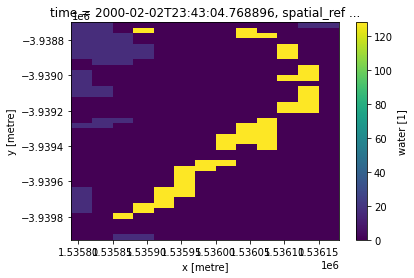

In [9]:
ds.water.plot()

Rasterize the waterbody to count the water pixels

In [10]:
wb_raster = dea_tools.spatial.xr_rasterize(wb, ds.water)

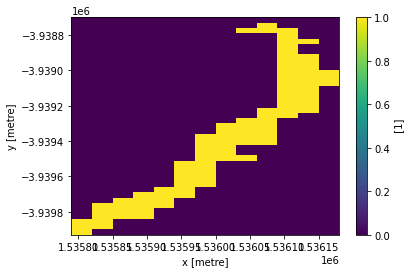

In [11]:
wb_raster.plot()

In [12]:
(ds.water.values[:, wb_raster.astype(bool)] == 128).sum()

44

In [13]:
wb_raster.sum()

<xarray.DataArray ()>
array(93, dtype=uint64)